In [1]:
import numpy as np
import pandas as pd
import os
from plotnine import * 

import matplotlib.pyplot as plt 
 

C:\Users\CHAUDCH\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\CHAUDCH\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
def preprocess(df):
    df = df.copy()
    
    def normalize_name(x):
        return " ".join([v.strip(",()[].\"'") for v in x.split(" ")])
    
    def ticket_number(x):
        return x.split(" ")[-1]
        
    def ticket_item(x):
        items = x.split(" ")
        if len(items) == 1:
            return "NONE"
        return "_".join(items[0:-1])
    
    df["Name"] = df["Name"].apply(normalize_name)
    df["Ticket_number"] = df["Ticket"].apply(ticket_number)
    df["Ticket_item"] = df["Ticket"].apply(ticket_item)                     
    return df
    
preprocessed_train_df = preprocess(train_df)
preprocessed_serving_df = preprocess(test_df)

preprocessed_train_df.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number,Ticket_item
0,1,0,3,Braund Mr Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,21171,A/5
1,2,1,1,Cumings Mrs John Bradley Florence Briggs Thayer,female,38.0,1,0,PC 17599,71.2833,C85,C,17599,PC
2,3,1,3,Heikkinen Miss Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3101282,STON/O2.
3,4,1,1,Futrelle Mrs Jacques Heath Lily May Peel,female,35.0,1,0,113803,53.1000,C123,S,113803,NONE
4,5,0,3,Allen Mr William Henry,male,35.0,0,0,373450,8.0500,NaN,S,373450,NONE


In [4]:
preprocessed_train_df = preprocessed_train_df.drop(["PassengerId","Ticket"], axis=1)
preprocessed_train_df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket_number,Ticket_item
0,0,3,Braund Mr Owen Harris,male,22.0,1,0,7.2500,NaN,S,21171,A/5
1,1,1,Cumings Mrs John Bradley Florence Briggs Thayer,female,38.0,1,0,71.2833,C85,C,17599,PC
2,1,3,Heikkinen Miss Laina,female,26.0,0,0,7.9250,NaN,S,3101282,STON/O2.
3,1,1,Futrelle Mrs Jacques Heath Lily May Peel,female,35.0,1,0,53.1000,C123,S,113803,NONE
4,0,3,Allen Mr William Henry,male,35.0,0,0,8.0500,NaN,S,373450,NONE


In [5]:
preprocessed_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Name           891 non-null    object 
 3   Sex            891 non-null    object 
 4   Age            714 non-null    float64
 5   SibSp          891 non-null    int64  
 6   Parch          891 non-null    int64  
 7   Fare           891 non-null    float64
 8   Cabin          204 non-null    object 
 9   Embarked       889 non-null    object 
 10  Ticket_number  891 non-null    object 
 11  Ticket_item    891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [6]:
survival_by_sex = preprocessed_train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(survival_by_sex)

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [7]:
gender_counts = preprocessed_train_df['Sex'].value_counts()
print(gender_counts)

Sex
male      577
female    314
Name: count, dtype: int64


C:\Users\CHAUDCH\AppData\Local\Temp\ipykernel_3884\3189080979.py:10: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fon

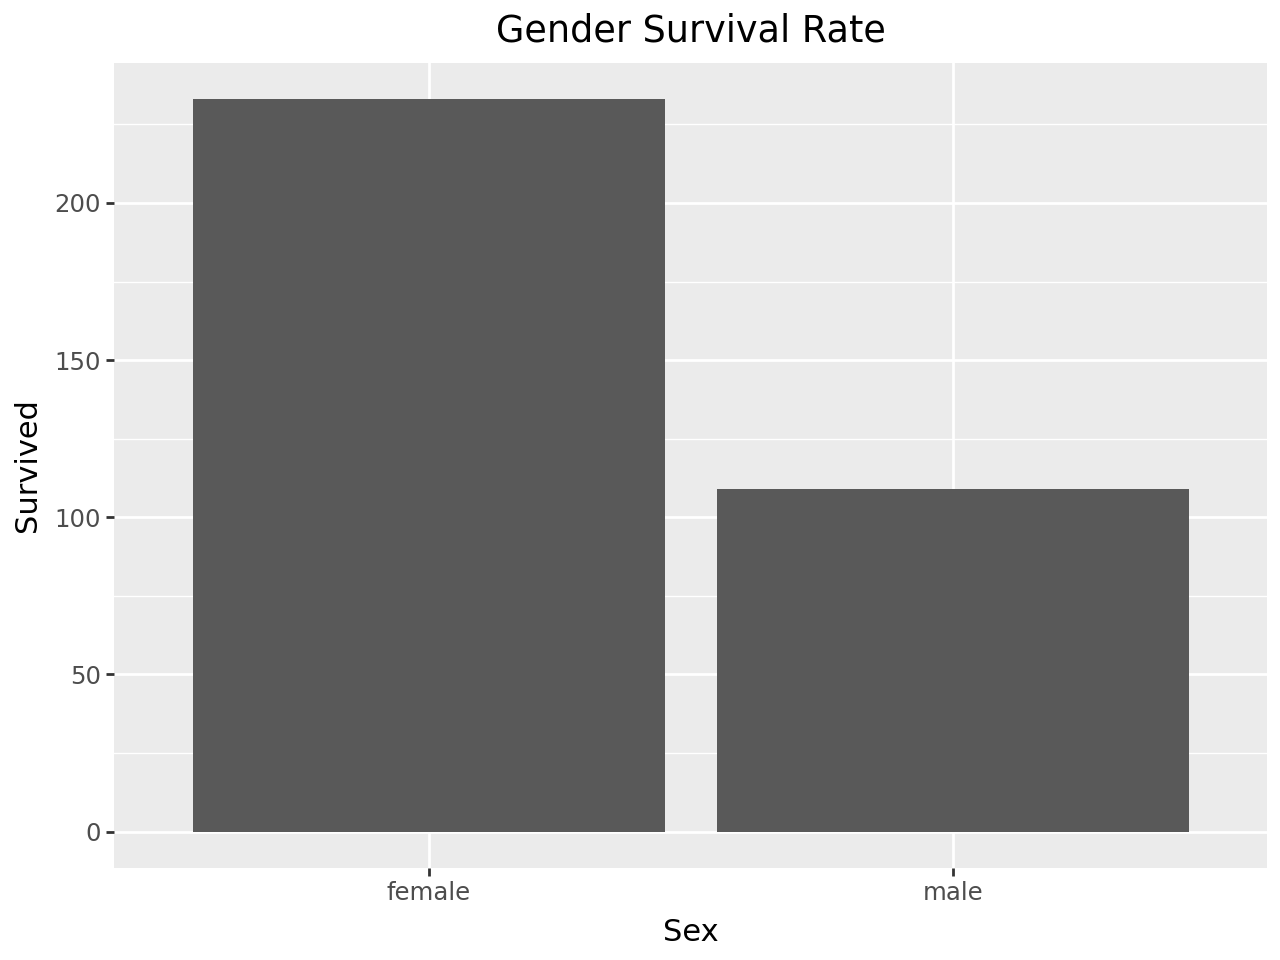

In [8]:
from plotnine import ggplot, aes, geom_col, ggtitle, theme, element_text

# Create the plot
gender_survival_plot = (ggplot(preprocessed_train_df)
                        + aes(x='Sex', y='Survived')
                        + geom_col()
                        + ggtitle('Gender Survival Rate')
                        + theme(text=element_text(family='NanumBarunGothic')))

print(gender_survival_plot)

C:\Users\CHAUDCH\AppData\Local\Temp\ipykernel_3884\3373889063.py:10: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fon

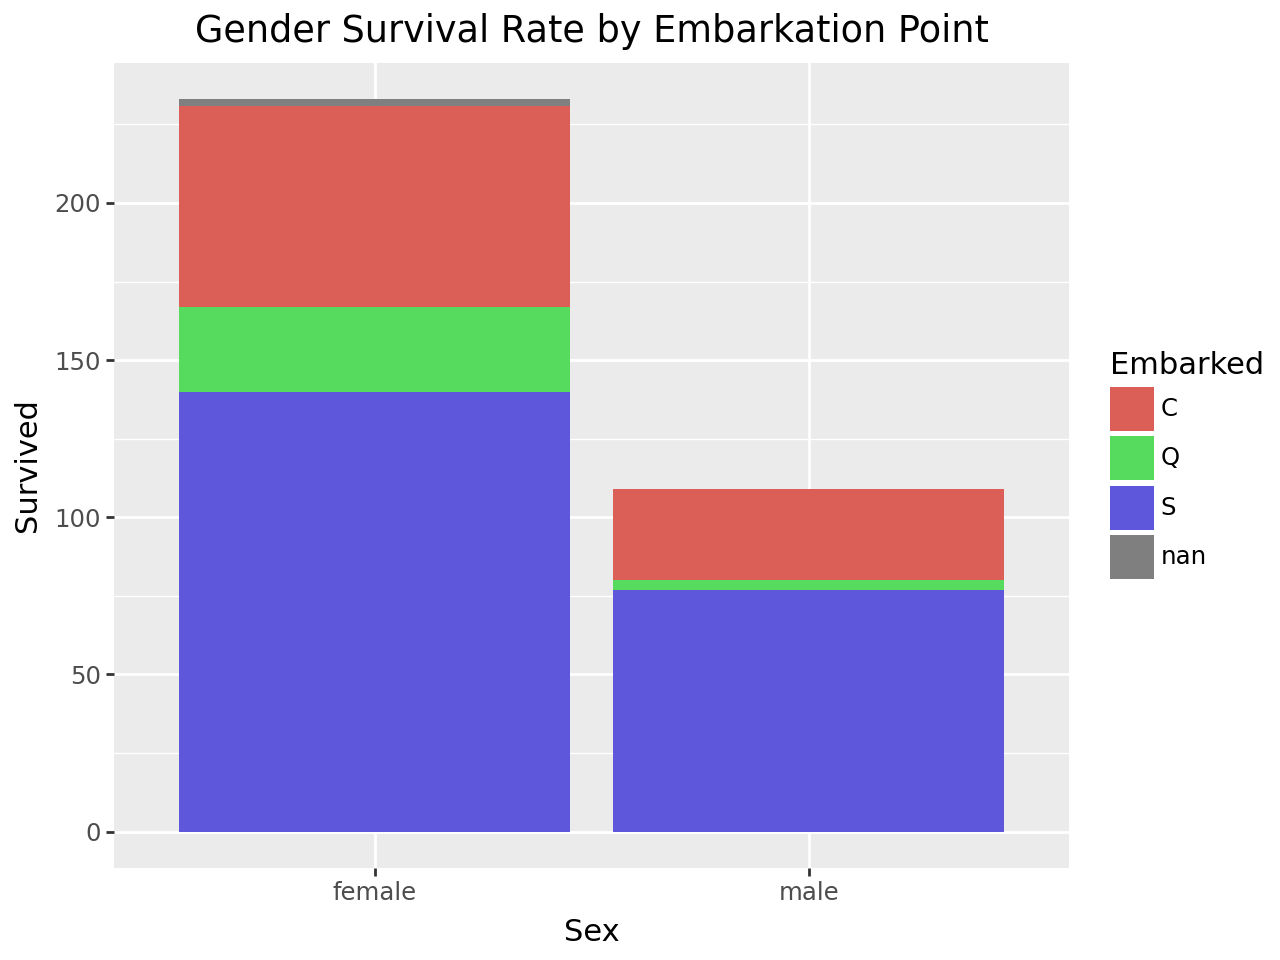

In [9]:
from plotnine import ggplot, aes, geom_col, ggtitle, theme, element_text

# Create the plot with custom fill color based on the 'Embarked' feature
embarked_gender_survival_plot = (ggplot(preprocessed_train_df)
                                 + aes(x='Sex', y='Survived', fill='Embarked')
                                 + geom_col()
                                 + ggtitle('Gender Survival Rate by Embarkation Point')
                                 + theme(text=element_text(family='NanumBarunGothic')))

print(embarked_gender_survival_plot)

C:\Users\CHAUDCH\AppData\Local\Temp\ipykernel_3884\891134497.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
C:\Users\CHAUDCH\AppData\Roaming\Python\Python39\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 177 rows containing missing values.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: 

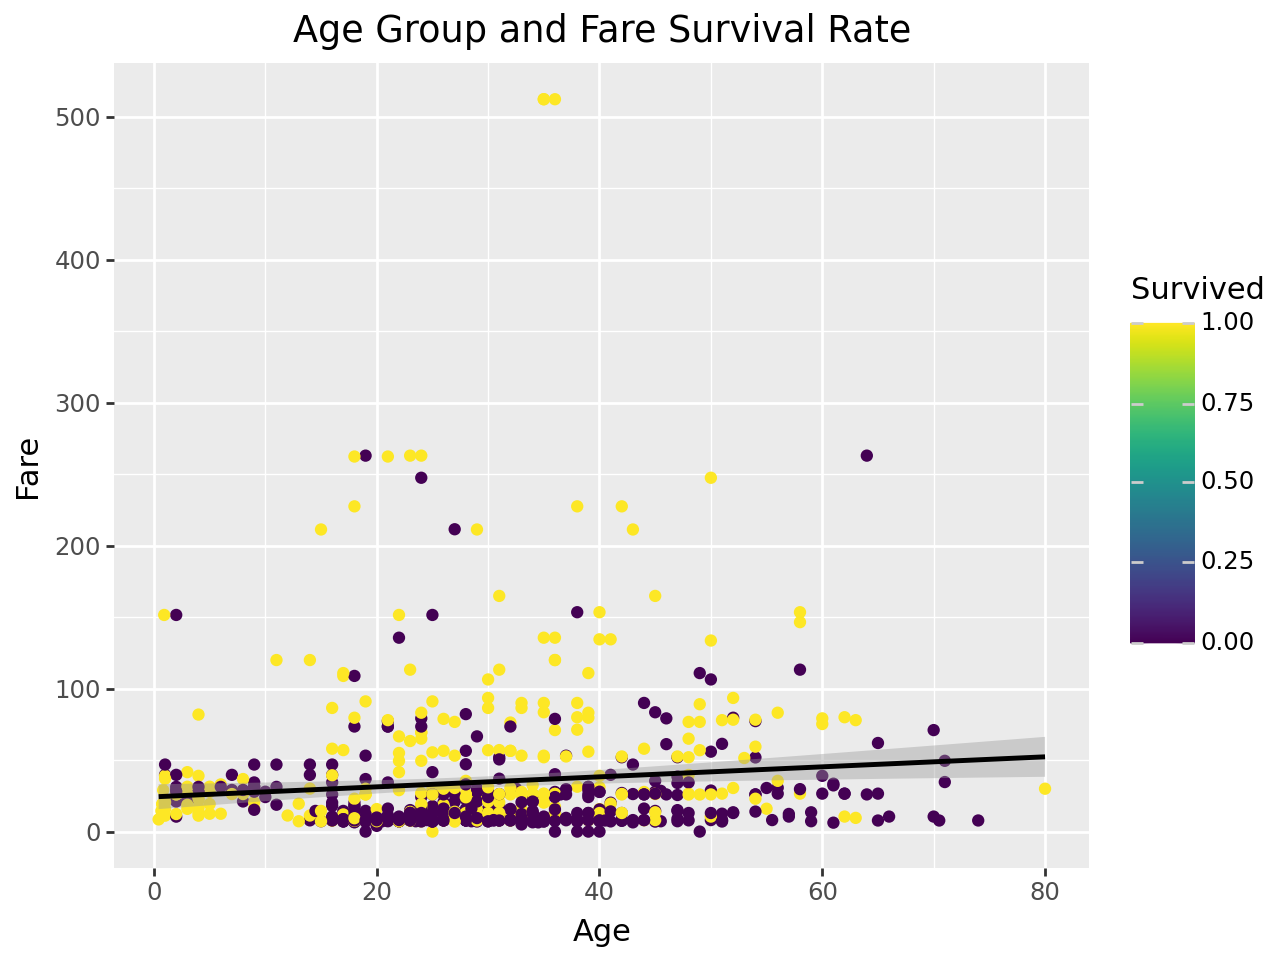

In [10]:
from plotnine import ggplot, aes, geom_point, stat_smooth, ggtitle, theme, element_text

# Create the scatter plot with a smoother
age_fare_survival_plot = (ggplot(preprocessed_train_df)
                          + aes(x='Age', y='Fare', color='Survived')
                          + geom_point()
                          + stat_smooth(method='lm')  # Adding a linear model smoother
                          + ggtitle('Age Group and Fare Survival Rate')
                          + theme(text=element_text(family='NanumBarunGothic')))

print(age_fare_survival_plot)

C:\Users\CHAUDCH\AppData\Local\Temp\ipykernel_3884\2063390887.py:11: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
C:\Users\CHAUDCH\AppData\Roaming\Python\Python39\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 177 rows containing missing values.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont:

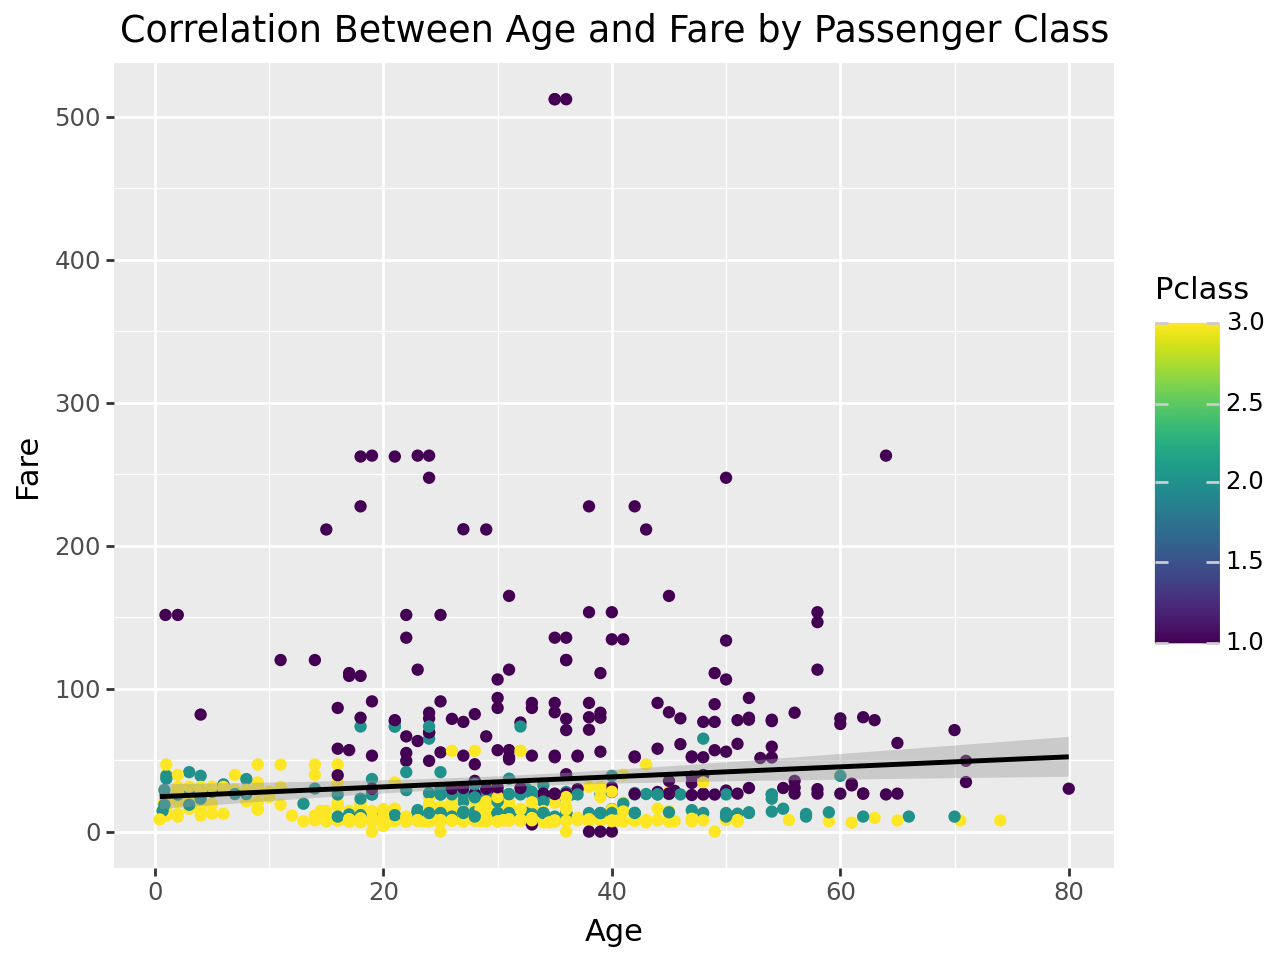

In [12]:
from plotnine import ggplot, aes, geom_point, stat_smooth, ggtitle, theme, element_text

# Create the scatter plot with a smoother
age_fare_class_plot = (ggplot(preprocessed_train_df)
                       + aes(x='Age', y='Fare', color='Pclass')
                       + geom_point()
                       + stat_smooth(method='lm')  # Adding a linear model smoother
                       + ggtitle('Correlation Between Age and Fare by Passenger Class')
                       + theme(text=element_text(family='NanumBarunGothic')))

print(age_fare_class_plot)

C:\Users\CHAUDCH\AppData\Local\Temp\ipykernel_3884\2562743176.py:12: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
C:\Users\CHAUDCH\AppData\Roaming\Python\Python39\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 177 rows containing missing values.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont:

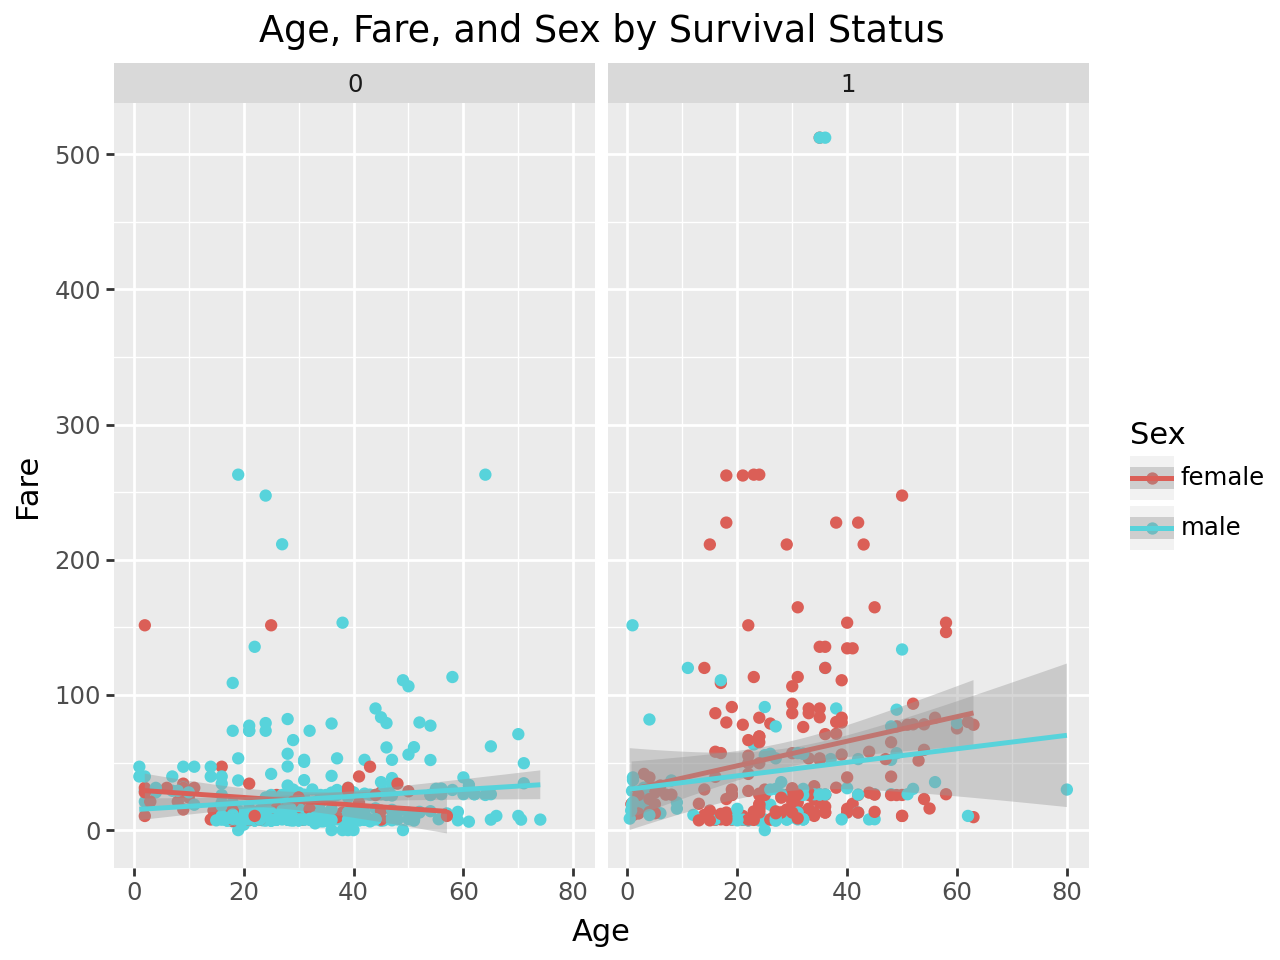

In [13]:
from plotnine import ggplot, aes, geom_point, stat_smooth, facet_wrap, ggtitle, theme, element_text

# Create the scatter plot with smoothing and facets
age_fare_sex_survival_plot = (ggplot(preprocessed_train_df) 
                              + aes(x='Age', y='Fare', color='Sex')
                              + geom_point()
                              + stat_smooth(method='lm')  # Adding a linear model smoother
                              + facet_wrap('~Survived')  # Creating separate plots by survival status
                              + ggtitle('Age, Fare, and Sex by Survival Status')
                              + theme(text=element_text(family='NanumBarunGothic')))

print(age_fare_sex_survival_plot)

C:\Users\CHAUDCH\AppData\Local\Temp\ipykernel_3884\2064308823.py:12: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
C:\Users\CHAUDCH\AppData\Roaming\Python\Python39\site-packages\plotnine\layer.py:364: PlotnineWarning: geom_point : Removed 177 rows containing missing values.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont:

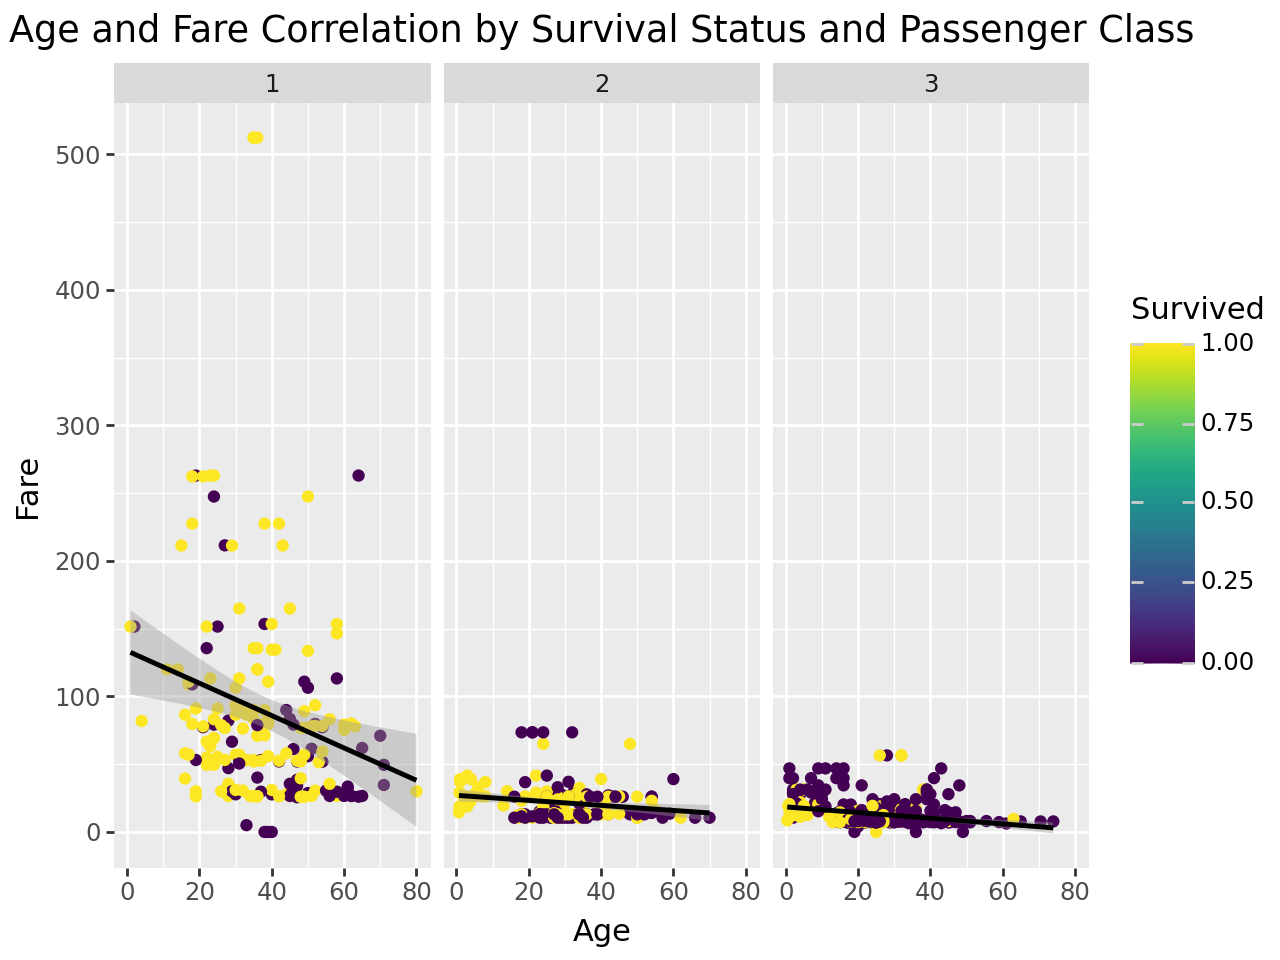

In [14]:
from plotnine import ggplot, aes, geom_point, stat_smooth, facet_wrap, ggtitle, theme, element_text

# Create the scatter plot with smoothing and facets by passenger class
age_fare_survival_plot = (ggplot(preprocessed_train_df) 
                          + aes(x='Age', y='Fare', color='Survived')
                          + geom_point()
                          + stat_smooth(method='lm')  # Adding a linear model smoother
                          + facet_wrap('~Pclass')  # Creating separate plots by passenger class
                          + ggtitle('Age and Fare Correlation by Survival Status and Passenger Class')
                          + theme(text=element_text(family='NanumBarunGothic')))

print(age_fare_survival_plot)

C:\Users\CHAUDCH\AppData\Local\Temp\ipykernel_3884\3251526736.py:10: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fon

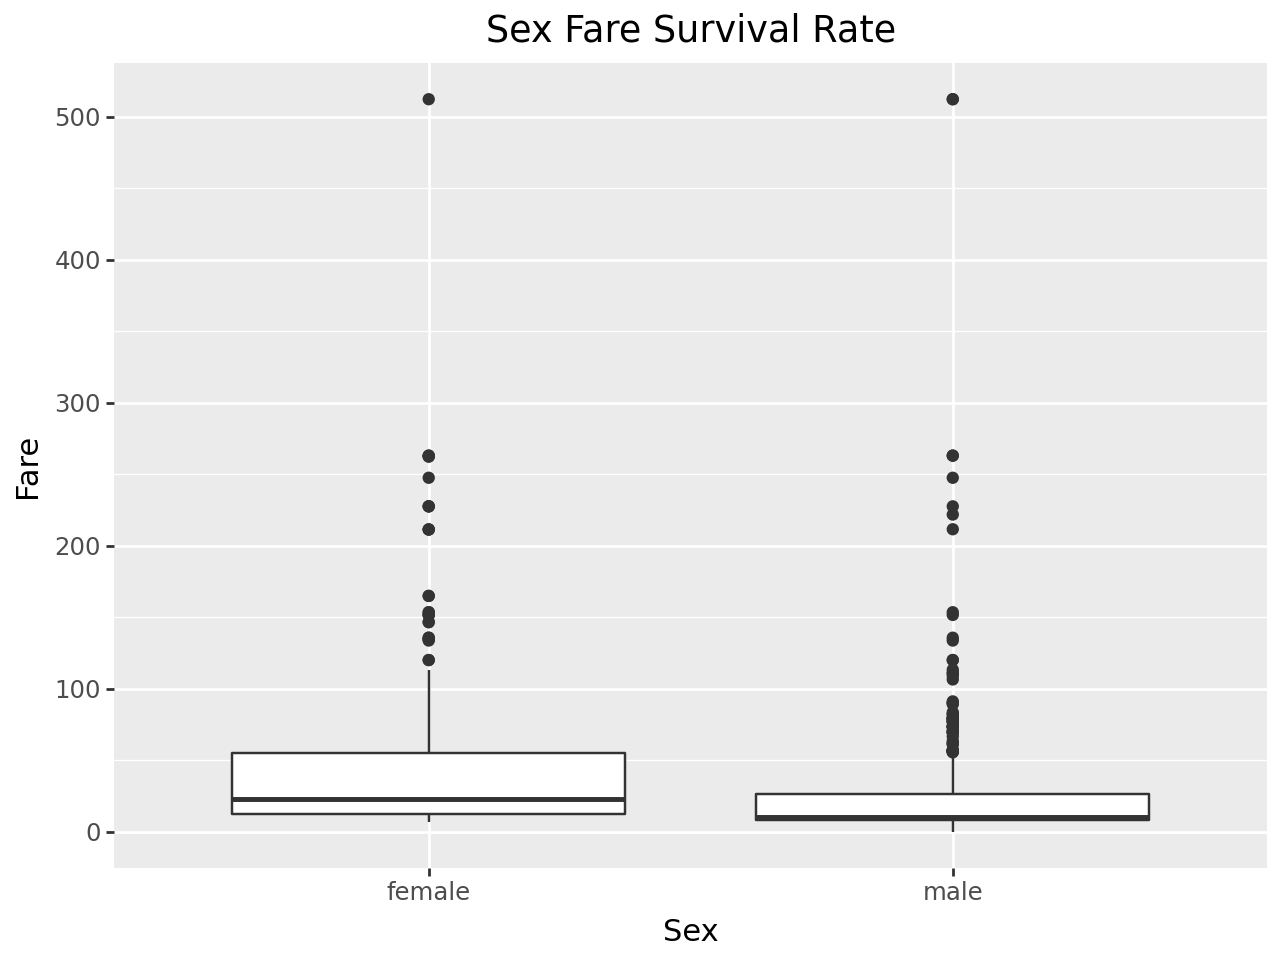

In [15]:
from plotnine import ggplot, aes, geom_boxplot, ggtitle, theme, element_text

# Create the box plot
sex_fare_survival_plot = (ggplot(preprocessed_train_df)
                          + aes(x='Sex', y='Fare', fill='Survived')
                          + geom_boxplot()
                          + ggtitle('Sex Fare Survival Rate')
                          + theme(text=element_text(family='NanumBarunGothic')))

print(sex_fare_survival_plot)

C:\Users\CHAUDCH\AppData\Local\Temp\ipykernel_3884\1258548083.py:10: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
C:\Users\CHAUDCH\AppData\Roaming\Python\Python39\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 177 rows containing non-finite values.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
find

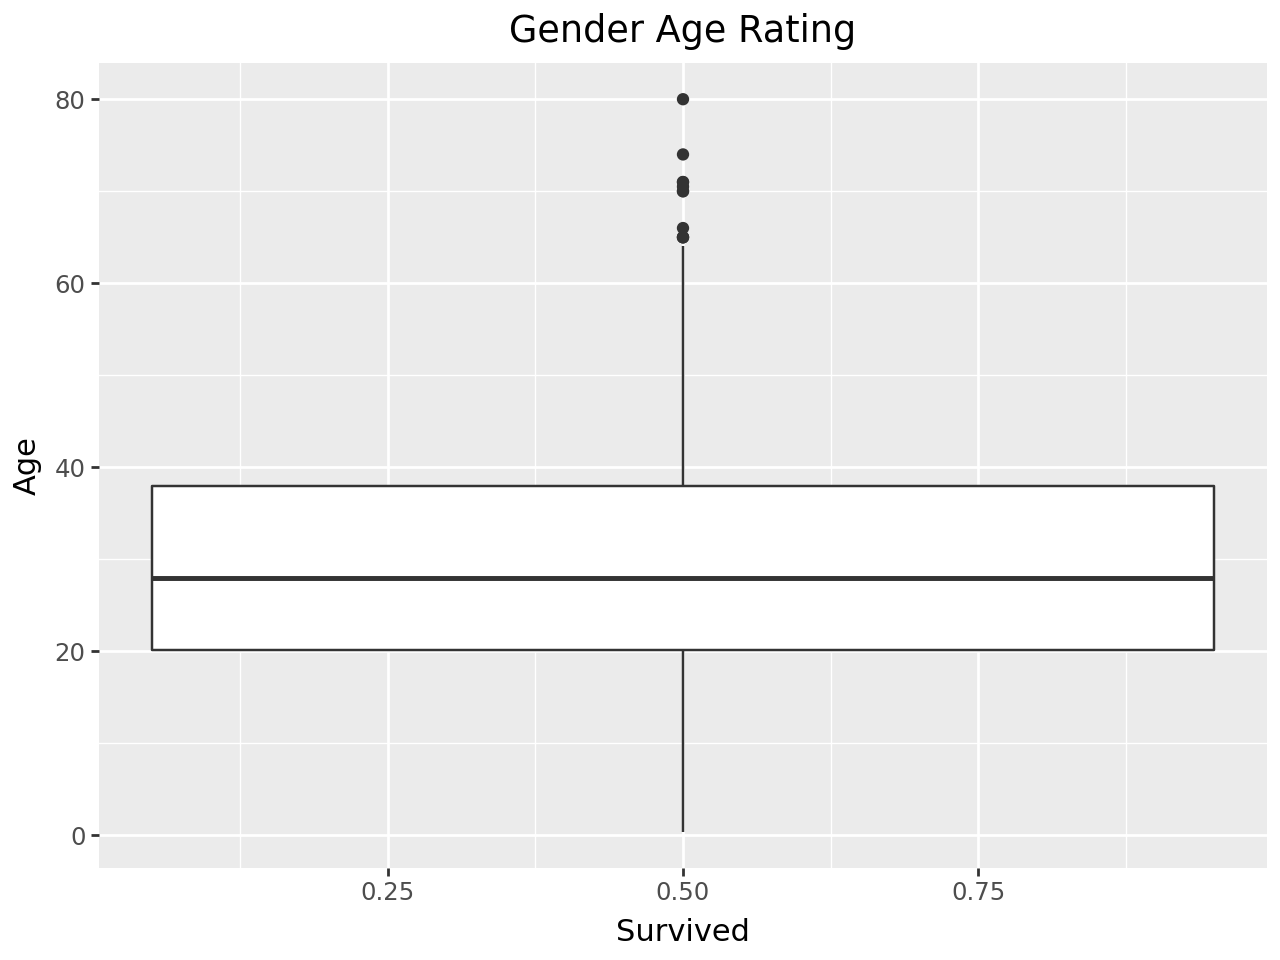

In [16]:
from plotnine import ggplot, aes, geom_boxplot, ggtitle, theme, element_text

# Create the box plot
age_class_survival_plot = (ggplot(preprocessed_train_df) 
                           + aes(x='Survived', y='Age', fill='Pclass')
                           + geom_boxplot()
                           + ggtitle('Gender Age Rating')
                           + theme(text=element_text(family='NanumBarunGothic')))

print(age_class_survival_plot)

In [19]:
input_features = list(preprocessed_train_df.columns)
input_features.remove("Survived")
#input_features.remove("Ticket_number")

print(f"Input features: {input_features}")

Input features: ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked', 'Ticket_number', 'Ticket_item']


In [20]:
pip install tensorflow_decision_forests

Defaulting to user installation because normal site-packages is not writeable
     --------------------------------------- 15.2/15.2 MB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 300.8/300.8 MB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 10.1 MB/s eta 0:00:00
     -------------------------------------- 442.0/442.0 kB 9.2 MB/s eta 0:00:00
     ---------------------------------------- 127.7/127.7 kB ? eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 9.9 MB/s eta 0:00:00
     ------------------------------------- 413.4/413.4 kB 13.0 MB/s eta 0:00:00
  Created wheel for tensorflow_decision_forests: filename=tensorflow_decision_forests-1.8.1-cp39-cp39-win_amd64.whl size=15337187 sha256=9cf9f710e0e098e737ec636904da135a4dadba4ace1e3c7ae9a65d79c7374c75
  Stored in directory: c:\users\chaudch\appdata\local\pip\cache\wh

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [21]:
import tensorflow_decision_forests as tfdf

NotFoundError: C:\Users\CHAUDCH\AppData\Roaming\Python\Python39\site-packages\tensorflow_decision_forests\tensorflow\ops\inference\inference.so not found